In [51]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [52]:
# Setting max rows and columns to 500

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)


In [53]:
# Setting float format to 2 decimal places

pd.options.display.float_format = '{:.2f}'.format

In [107]:
# Reading data from a csv file

loan_data = pd.read_csv('loan.csv')

# checking the first five rows for loan_data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [108]:
# checking the shape of the loan_data
# rows = 39717 , columns = 111
loan_data.shape

(39717, 111)

In [109]:
# checking the loan_data info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [110]:
# Checking duplicate entries
loan_data[loan_data.duplicated()].shape[0]

0

# Data Cleaning


In [111]:
# checking the percentage of null values for all the columns in loan_data

loan_data.isnull().sum() * 100 / len(loan_data)

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [112]:
# We will drop all those columns where all the values are null 

nan_cols = loan_data.columns[loan_data.isnull().all()]
loan_data = loan_data.drop(columns = nan_cols)

# Total columns dropped
print("Total number of columns dropped - ", len(nan_cols))

# After dropping the columns current shape of the loan_data

print("Current shape of the data", loan_data.shape)


Total number of columns dropped -  54
Current shape of the data (39717, 57)


In [113]:
# Dropping columns which have more than 50 % of null values
# Columns - mths_since_last_delinq, mths_since_last_record, next_pymnt_d 

cols_50perc_na = ['mths_since_last_delinq','mths_since_last_record','next_pymnt_d']
loan_data = loan_data.drop(columns = cols_50perc_na)

In [114]:
# Dropping all those columns which have no variation in the data as it won't be helpful in our analysis

# Columns - 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med','policy_code', 'application_type', 'acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'

no_var_cols = loan_data.columns[loan_data.nunique() == 1]
loan_data = loan_data.drop(columns = no_var_cols)

In [115]:
# Dropping all those columns where all the values are unique or contains textual data
# Dropping column zip_code as it doesn't contain complete information for analysis


unique_cols = ['id','member_id','emp_title','url','desc','title','zip_code']
loan_data = loan_data.drop(columns = unique_cols)

In [116]:
# Dropping records where loan_status is 'Current' as the loan is in progress and can impact the analysis

loan_data = loan_data[loan_data.loan_status.isin(['Fully Paid','Charged Off'])]

In [117]:
loan_data.shape

(38577, 38)

In [118]:
# Dropping columns that will be utitlized in the post-loan approval process, as we only need during the loan application process.
# Dropping pub_rec as we can utilise the column pub_rec_bankruptcies
post_approval_cols = ['out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','revol_bal','revol_util','total_acc','pub_rec']

loan_data = loan_data.drop(columns=post_approval_cols)


In [119]:
# Dropping rows which have null values for columns 'emp_length' and 'pub_rec_bankruptcies'

loan_data = loan_data[~loan_data['emp_length'].isna()]

loan_data = loan_data[~loan_data['pub_rec_bankruptcies'].isna()]

In [120]:
loan_data.shape

(36847, 22)

## Correcting Data Types

In [121]:
loan_data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec_bankruptcies    float64
dtype: object

In [122]:
# converting into float values

cols_to_convert = ['loan_amnt','funded_amnt']
loan_data[cols_to_convert] = loan_data[cols_to_convert].astype('float')



In [123]:
# Removing 'months' from term column and converting the term column to 'int'

loan_data['term'] = loan_data.term.apply(lambda x : int(x.split()[0]))

In [124]:
# Removing '%' and converting 'int_rate' from string to float

loan_data['int_rate'] = loan_data.int_rate.apply(lambda x : float(x.replace('%','')))

In [125]:
# Converting 'pub_rec_bankriptcies' from float to int

loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].astype('int64')

In [126]:
# Converting 'emp_length' from string to int

def emp_length_int(emp_length):
    if emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    else:
        emp_length = emp_length.split(' ')[0]
        return int(emp_length)
    

loan_data['emp_length'] = loan_data['emp_length'].apply(emp_length_int)

In [127]:
# Converting columns 'issue_d' and 'earliest_cr_line' to date and time datatype 

loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [128]:
# Converting column 'sub_grade' to numeric data type for better analysis

loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))


# Derived Columns

In [129]:
# Deriving columns 'issue_month' and 'issue_year' from datetime column 'issue_d'

loan_data['issue_month'] =  loan_data['issue_d'].dt.month
loan_data['issue_year'] = loan_data['issue_d'].dt.year

In [130]:
loan_data.shape

(36847, 24)

# Removing Outliers

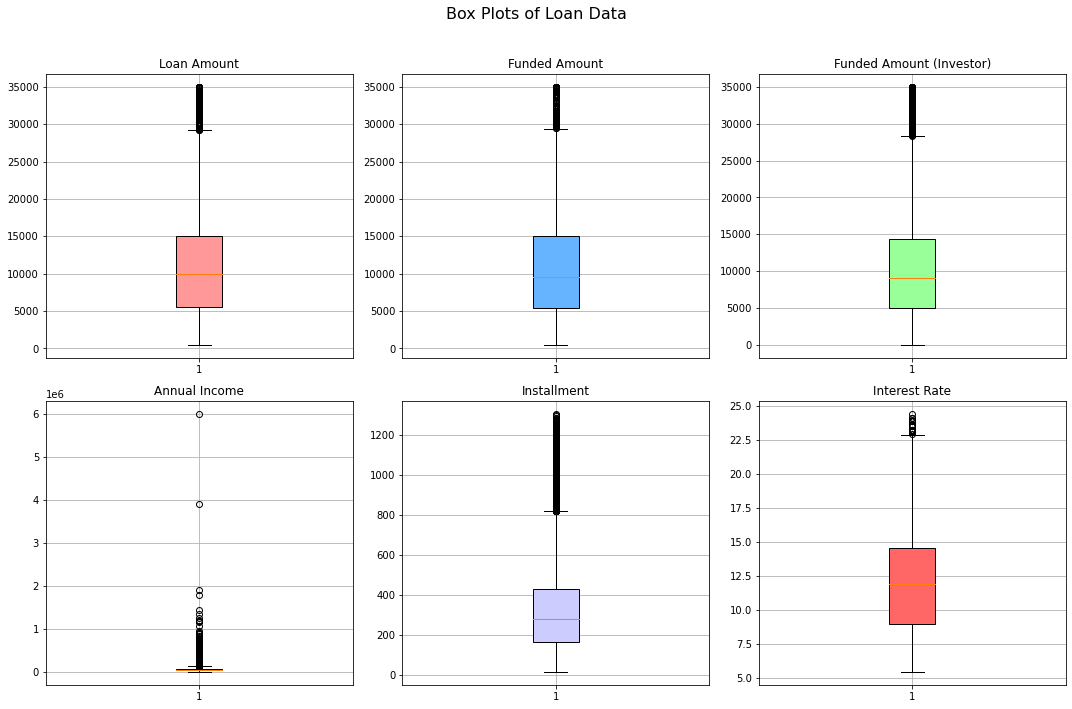

In [131]:
# Checking the columns having outliers

# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Box Plots of Loan Data', fontsize=16)

# Add titles, grid, and color
box_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#CCCCFF', '#FF6666']

# Loan amount
axs[0, 0].boxplot(loan_data['loan_amnt'], patch_artist=True, boxprops=dict(facecolor=box_colors[0]))
axs[0, 0].set_title('Loan Amount')
axs[0, 0].grid(True)

# Funded amount
axs[0, 1].boxplot(loan_data['funded_amnt'], patch_artist=True, boxprops=dict(facecolor=box_colors[1]))
axs[0, 1].set_title('Funded Amount')
axs[0, 1].grid(True)

# Funded amount (investor)
axs[0, 2].boxplot(loan_data['funded_amnt_inv'], patch_artist=True, boxprops=dict(facecolor=box_colors[2]))
axs[0, 2].set_title('Funded Amount (Investor)')
axs[0, 2].grid(True)

# Annual income
axs[1, 0].boxplot(loan_data['annual_inc'], patch_artist=True, boxprops=dict(facecolor=box_colors[3]))
axs[1, 0].set_title('Annual Income')
axs[1, 0].grid(True)

# Installment
axs[1, 1].boxplot(loan_data['installment'], patch_artist=True, boxprops=dict(facecolor=box_colors[4]))
axs[1, 1].set_title('Installment')
axs[1, 1].grid(True)

# Interest Rate
axs[1, 2].boxplot(loan_data['int_rate'], patch_artist=True, boxprops=dict(facecolor=box_colors[5]))
axs[1, 2].set_title('Interest Rate')
axs[1, 2].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()



In [132]:
# Removing outliers for columns

outlier_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate','installment','annual_inc']

def remove_outliers(data,columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR 
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)] 
    return data

# After removing the outliers

loan_data = remove_outliers(loan_data,outlier_cols)        

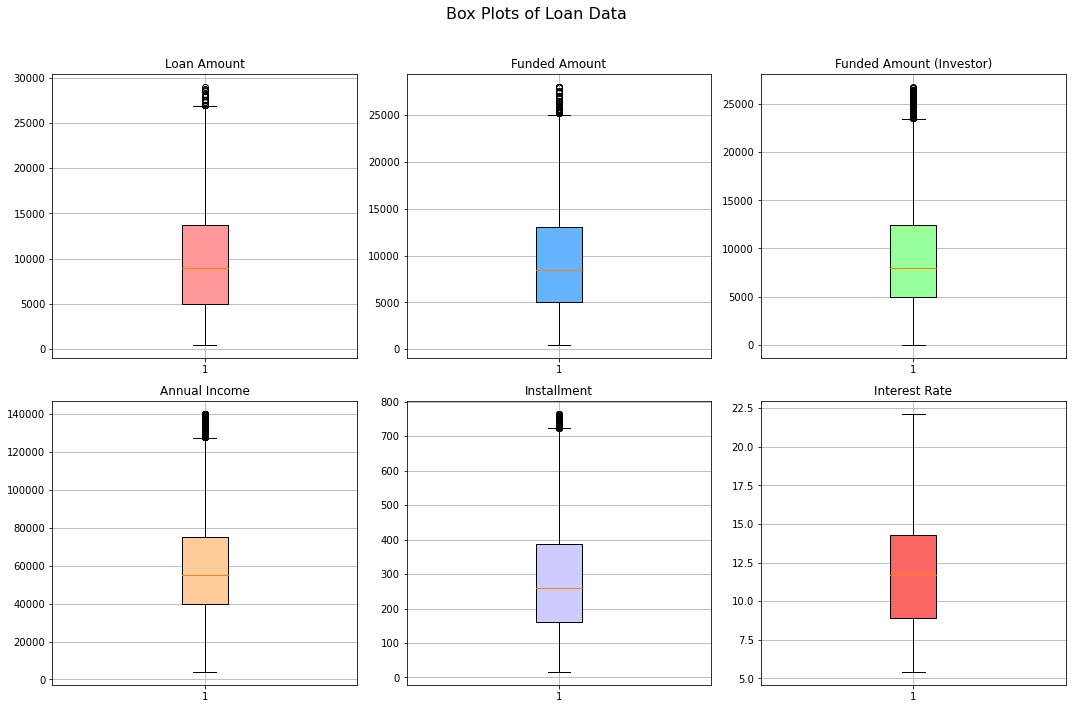

In [133]:
# After removing the outliers

# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Box Plots of Loan Data', fontsize=16)

# Add titles, grid, and color
box_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#CCCCFF', '#FF6666']

# Loan amount
axs[0, 0].boxplot(loan_data['loan_amnt'], patch_artist=True, boxprops=dict(facecolor=box_colors[0]))
axs[0, 0].set_title('Loan Amount')
axs[0, 0].grid(True)

# Funded amount
axs[0, 1].boxplot(loan_data['funded_amnt'], patch_artist=True, boxprops=dict(facecolor=box_colors[1]))
axs[0, 1].set_title('Funded Amount')
axs[0, 1].grid(True)

# Funded amount (investor)
axs[0, 2].boxplot(loan_data['funded_amnt_inv'], patch_artist=True, boxprops=dict(facecolor=box_colors[2]))
axs[0, 2].set_title('Funded Amount (Investor)')
axs[0, 2].grid(True)

# Annual income
axs[1, 0].boxplot(loan_data['annual_inc'], patch_artist=True, boxprops=dict(facecolor=box_colors[3]))
axs[1, 0].set_title('Annual Income')
axs[1, 0].grid(True)

# Installment
axs[1, 1].boxplot(loan_data['installment'], patch_artist=True, boxprops=dict(facecolor=box_colors[4]))
axs[1, 1].set_title('Installment')
axs[1, 1].grid(True)

# Debt-to-income ratio
axs[1, 2].boxplot(loan_data['int_rate'], patch_artist=True, boxprops=dict(facecolor=box_colors[5]))
axs[1, 2].set_title('Interest Rate')
axs[1, 2].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# Univariate Analysis

In [134]:
# Function for displaying the counts
def add_counts(ax): 
    for p in ax.patches: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    fontsize=10, color='black')

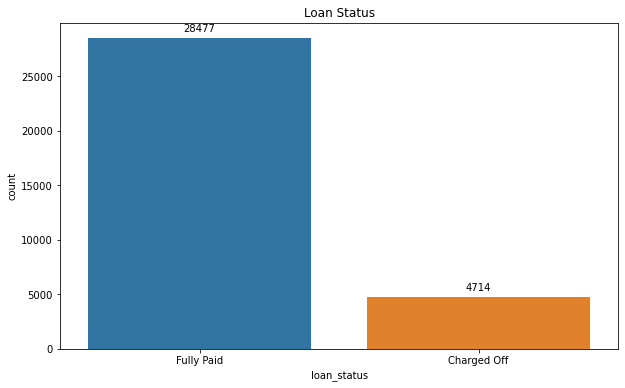

Fully Paid     28477
Charged Off     4714
Name: loan_status, dtype: int64


In [135]:
plt.figure(figsize = (10,6))
loanax = sns.countplot(x = loan_data['loan_status'])
plt.title('Loan Status')
add_counts(loanax)
plt.show()

print(loan_data['loan_status'].value_counts())

# Applicants that have defaulted are very less as compared to Fully paid applicants.

In [136]:
# We will be performing univariate analysis where the loan status == 'Charged Off'

charged_off_data = loan_data[loan_data['loan_status'] == 'Charged Off']


## Univariate Analysis for Ordered Categorical Variables

- Term
- Grade
- Sub Grade
- Emp Length
- Issue Year
- Issue Month

<Figure size 432x288 with 0 Axes>

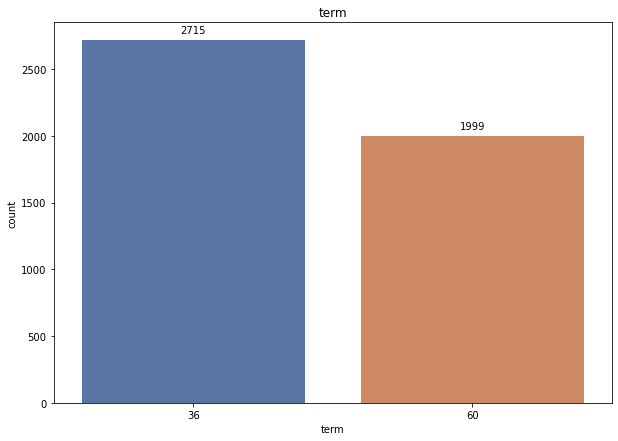

<Figure size 720x504 with 0 Axes>

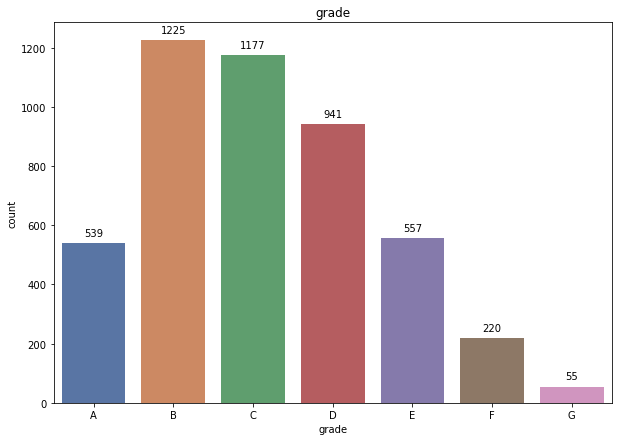

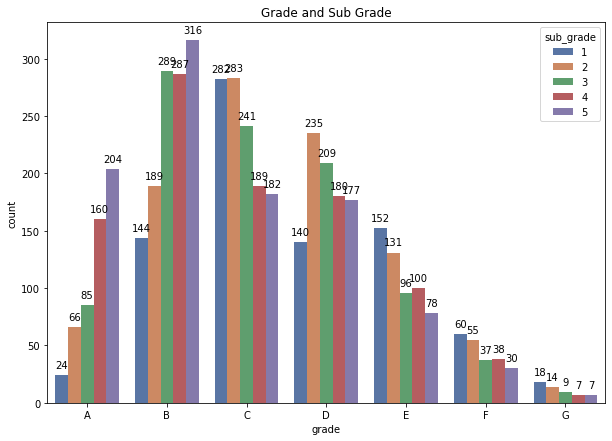

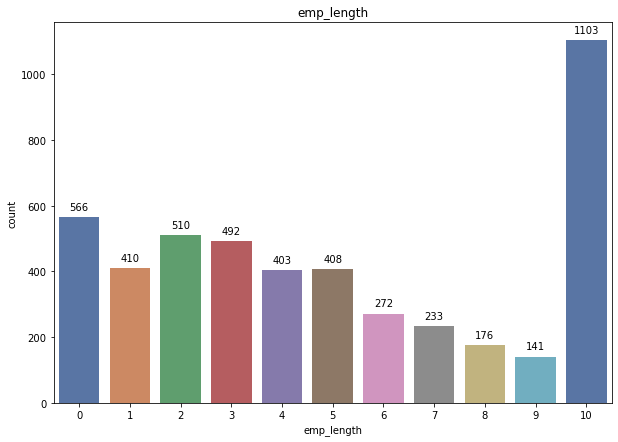

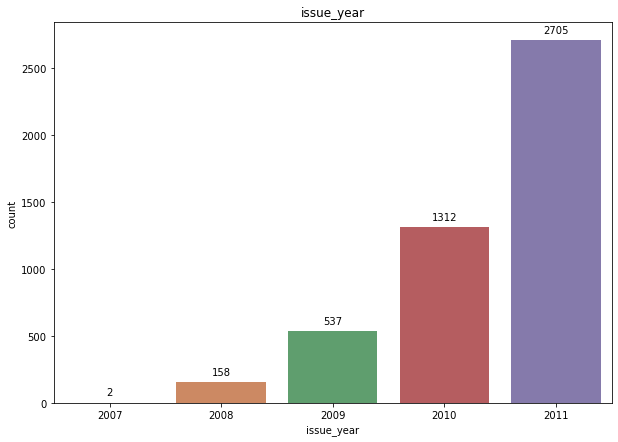

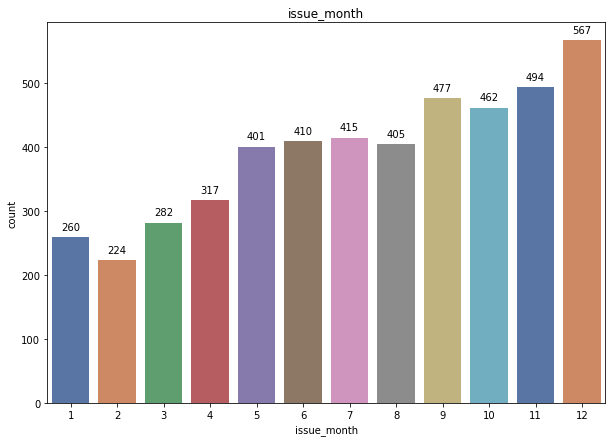

In [137]:

def multiple_countplots(data,columns):
    plt.suptitle('Countplot for Ordered Categorical Variables', fontsize=16)
    for col in columns:
        plt.figure(figsize=(10,7))
        
        if col == 'grade':
            plt.figure(figsize=(10,7))
            ax1 = sns.countplot(x = col , data = data, order = ['A','B','C','D','E','F','G'], palette = 'deep')
            plt.title(col)
            add_counts(ax1)
            
            plt.figure(figsize=(10,7))
            ax2 = sns.countplot(x = col , data = data, order = ['A','B','C','D','E','F','G'], hue = 'sub_grade',palette = 'deep')
            plt.title("Grade and Sub Grade")
            add_counts(ax2)
            
        else:
            ax3 = sns.countplot(x = col , data = data, palette = 'deep')
            plt.title(col)
            add_counts(ax3)
        plt.show()

ord_cat_cols = ['term','grade','emp_length','issue_year','issue_month']
multiple_countplots(charged_off_data,ord_cat_cols)

## Observation for Univariate Analysis for Ordered Categorical variables

- More than 2500 applicants choose term as 36 months for the repayment of loan, indicating this is the most popular term     among the borrowers.
- 1225 Applicants with credit score B has the highest number of Charged Off loan applicants indicating financial issues.
- Within Grade B, loan applicants with sub grade B5 had highest number of charged off loan applicants.
- Applicants with more than 10 years of experience indicate that better experience doesnt higky correlate with loan           repayment.
- In the year 2011, highest number of loan applicants were charged off indicating many of them were suffering from           financial issues.
- December has the highest number of loan applicants that were charged-off indicating that during holiday season many of     them took loans that were charged off.

## Univariate Analysis for Unordered Categorical Variables

- Home Ownership
- Verification Status
- Purpose
- Address State


<Figure size 432x288 with 0 Axes>

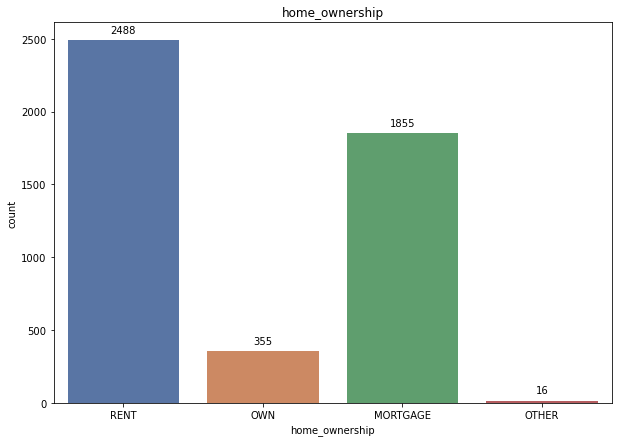

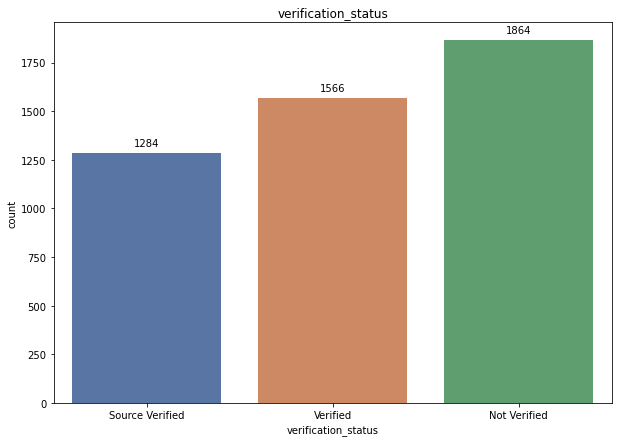

In [138]:
unord_cat_cols = ['home_ownership','verification_status']
multiple_countplots(charged_off_data,unord_cat_cols)

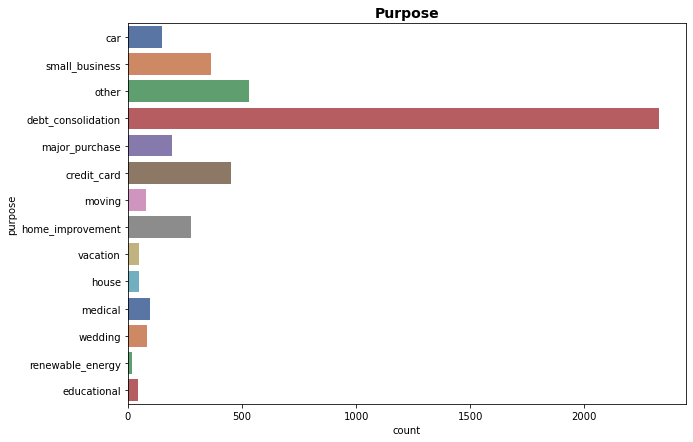

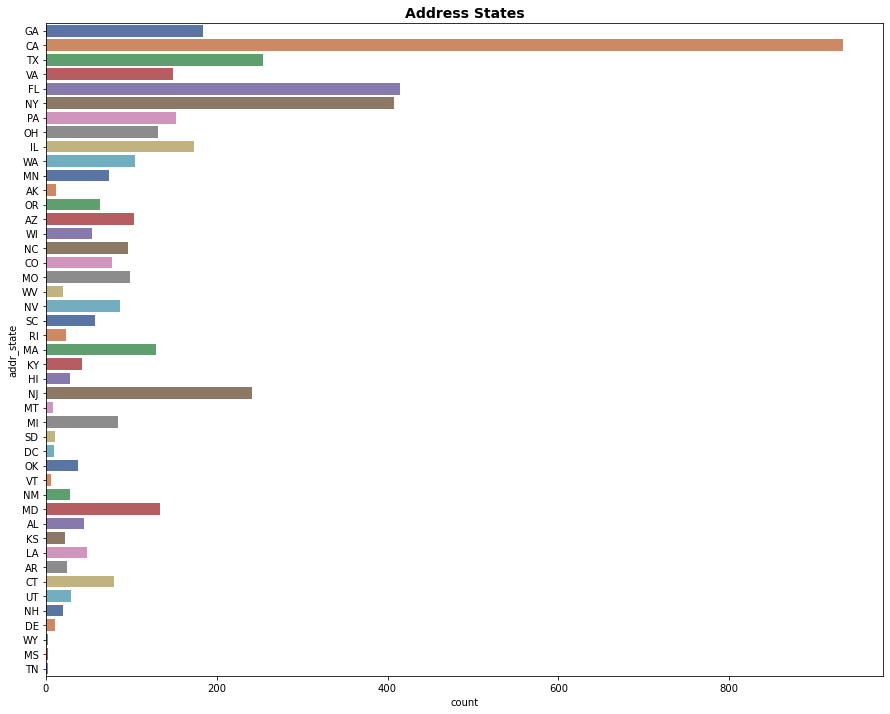

In [139]:
# Countplot for Purpose
plt.figure(figsize=(10, 7))
sns.countplot(y = 'purpose', data = charged_off_data, palette = 'deep')
plt.title('Purpose', fontsize=14, weight='bold')
plt.show()

# Countplot for Address States
plt.figure(figsize=(15, 12))
sns.countplot(y = 'addr_state', data = charged_off_data, palette = 'deep')
plt.title('Address States', fontsize=14, weight='bold')
plt.show()

## Observation for Univariate Analysis for Unordered Categorical Variables

- Loan Applicants who don't own their home and are staying on rent tend to have higher possiblity of not repaying the         charged off loan.
- More than 1700 loan applicants that were not verified took loans that were charged off.
- Loan Applicants who applied for loans to consolidate the debt have the highest rate of charged off loans.
- Address state 'CA' has the highest number of loan applicants that were charged off.

## Numerical or Quantitative Variables


- loan amount
- annual income
- dti
- interest rate
- installment
- Public Record Bankruptcies
- Delinquencies in 2 years
- Inquires in last 6 months 
- Funded Amount
- Open Accounts

In [140]:
# Bucketing loan_amnt_grps, annual_inc_grps, dti_grps, int_rate_grps,installment

charged_off_data['loan_amnt_grps'] = pd.cut(charged_off_data.loan_amnt,bins = 6, labels = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])
charged_off_data['annual_inc_grps'] = pd.cut(charged_off_data.annual_inc,bins = 5, labels = ['0-35k','35k-65k','65k-95k','95k-125k','125k-155k'])
charged_off_data['dti_grps'] = pd.cut(charged_off_data.dti,bins = 5, labels = ['0-6','6-12','12-18','18-24','24-30'])
charged_off_data['int_rate_grps'] = pd.cut(charged_off_data.int_rate,bins = [0, 11.14, 13.49, 16.02, 20, 25], labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'])
charged_off_data['installment_grps'] = pd.cut(charged_off_data.installment,bins = 5, labels = ['0-150','150-300','300-450','450-600','600-750'])
charged_off_data['funded_amnt_grps'] = pd.cut(charged_off_data.funded_amnt,bins = 6, labels = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])

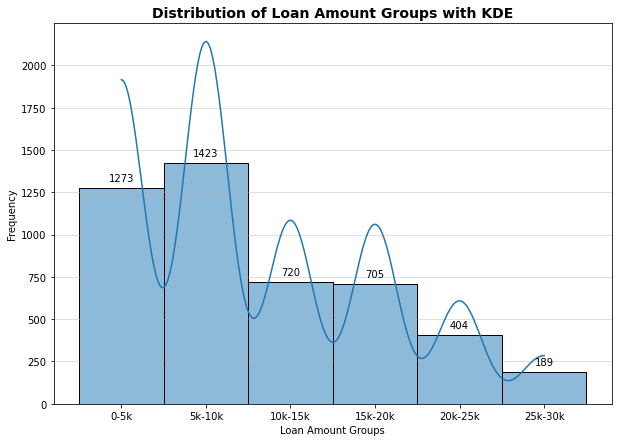

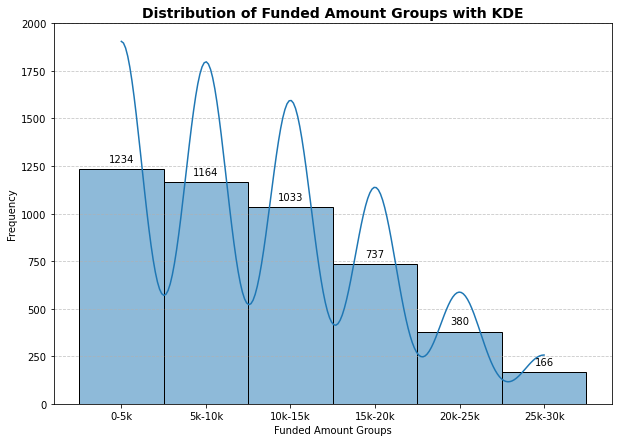

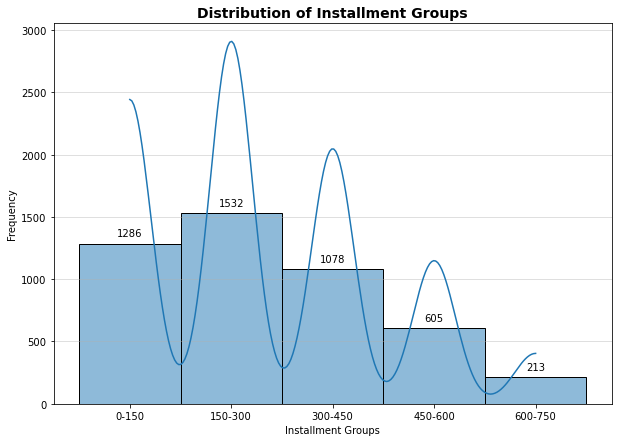

<Figure size 720x504 with 0 Axes>

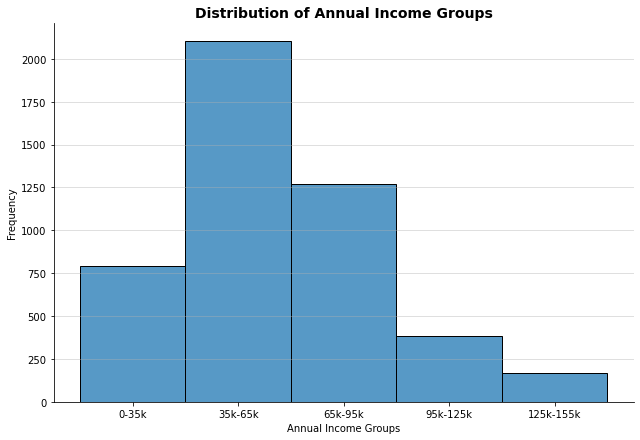

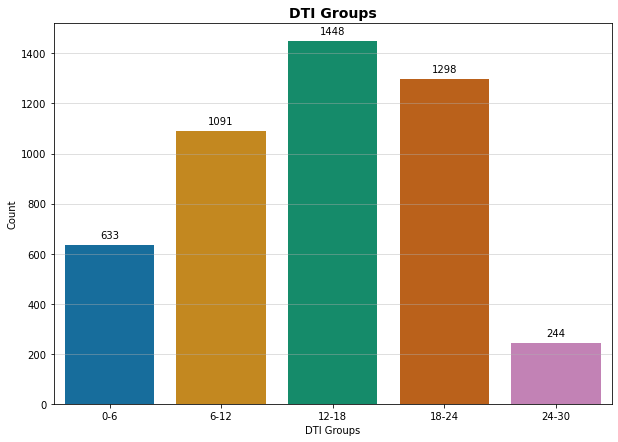

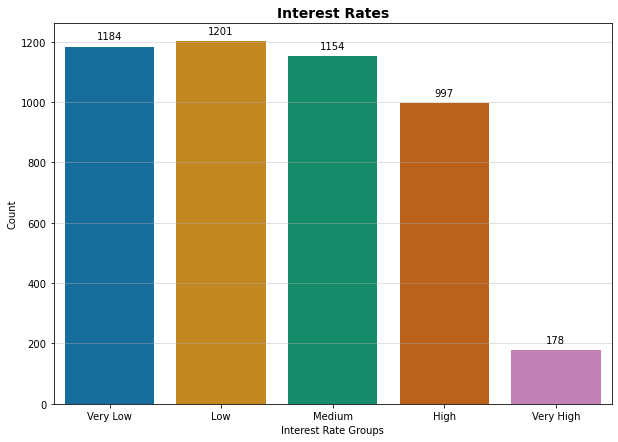

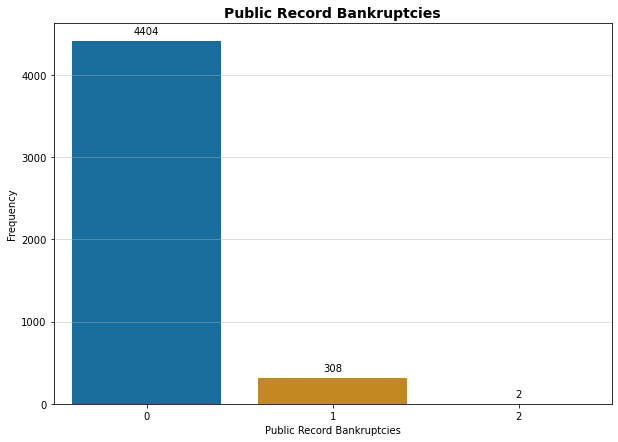

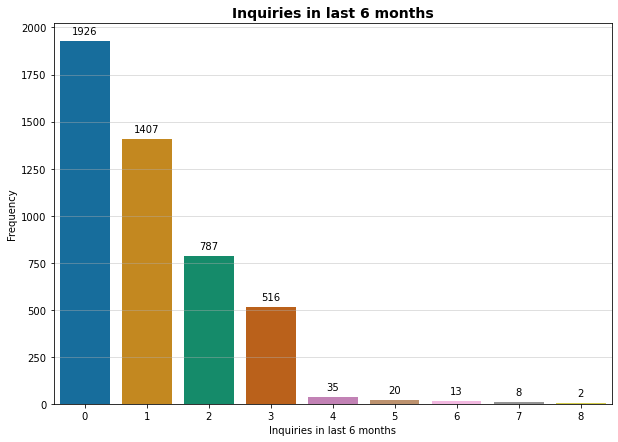

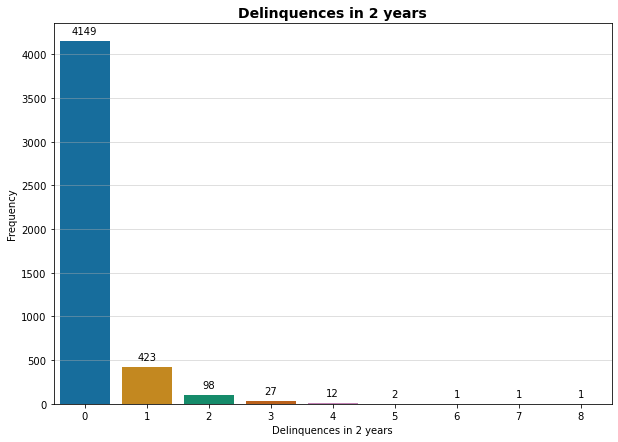

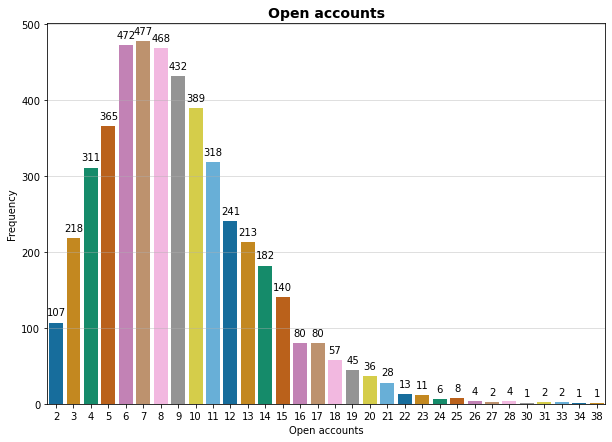

In [141]:
# Hist plot for loan amount groups
plt.figure(figsize=(10, 7))
ax1 = sns.histplot(x='loan_amnt_grps', data=charged_off_data, kde=True, palette='colorblind')
add_counts(ax1)
plt.title('Distribution of Loan Amount Groups with KDE', fontsize=14, weight='bold')
plt.xlabel('Loan Amount Groups')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# Hist plot for Funded Amount
plt.figure(figsize=(10, 7))
ax2 = sns.histplot(x='funded_amnt_grps', data=charged_off_data, kde=True, palette='colorblind')
add_counts(ax2)
plt.title('Distribution of Funded Amount Groups with KDE', fontsize=14, weight='bold')
plt.xlabel('Funded Amount Groups')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Hist plot for installments
plt.figure(figsize=(10, 7))
ax3 = sns.histplot(x='installment_grps', bins = 6, data=charged_off_data, kde=True, palette='colorblind')
add_counts(ax3)
plt.title('Distribution of Installment Groups', fontsize=14, weight='bold')
plt.xlabel('Installment Groups')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# Displot for annual income groups
plt.figure(figsize=(10, 7))
sns.displot(x='annual_inc_grps', data=charged_off_data, palette='colorblind',aspect=1.5, height=6)
plt.title('Distribution of Annual Income Groups', fontsize=14, weight='bold')
plt.xlabel('Annual Income Groups')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# Countplot for dti grps
plt.figure(figsize=(10, 7))
ax5 = sns.countplot(x='dti_grps', data=charged_off_data, palette='colorblind')
add_counts(ax5)
plt.title('DTI Groups', fontsize=14, weight='bold')
plt.xlabel('DTI Groups')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# Countplot for interest rate grps
plt.figure(figsize=(10, 7))
ax6 = sns.countplot(x='int_rate_grps', data=charged_off_data, palette='colorblind')
add_counts(ax6)
plt.title('Interest Rates', fontsize=14, weight='bold')
plt.xlabel('Interest Rate Groups')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# Countplot for Public Record Bankruptcies
plt.figure(figsize=(10, 7))
ax7 = sns.countplot(x = 'pub_rec_bankruptcies', data = charged_off_data, palette='colorblind')
add_counts(ax7)
plt.title('Public Record Bankruptcies', fontsize=14, weight='bold')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# Countplot for Inquiries in last 6 months (Credit card)
plt.figure(figsize=(10, 7))
ax8 = sns.countplot(x = 'inq_last_6mths', data = charged_off_data, palette='colorblind')
add_counts(ax8)
plt.title('Inquiries in last 6 months', fontsize=14, weight='bold')
plt.xlabel('Inquiries in last 6 months')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# Countplot for Delinquences in 2 years
plt.figure(figsize=(10, 7))
ax9 = sns.countplot(x = 'delinq_2yrs', data = charged_off_data, palette='colorblind')
add_counts(ax9)
plt.title('Delinquences in 2 years', fontsize=14, weight='bold')
plt.xlabel('Delinquences in 2 years')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# Countplot for Open accounts
plt.figure(figsize=(10, 7))
ax10 = sns.countplot(x = 'open_acc', data = charged_off_data, palette='colorblind')
add_counts(ax10)
plt.title('Open accounts', fontsize=14, weight='bold')
plt.xlabel('Open accounts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

## Observation for Numerical Variables

- Applicants who have loan amounts ranging from 5k to 10k USD tend to not repay the loan that was charged off indicating     potential risk among this group
- Applicants with funded amount between 0 to 5000 USD show higher tendency to default on their loans.
- Applicants who have installments between 150 to 300 tend to face difficulties in paying their charged off loans.
- Applicants who have an annual income ranging from 35k to 65k USD show higher tendency to default on their loans.
- Applicants with DTI groups ranging from 12 to 18 tend to default on their loans as compared to other groups.
- Applicants with very low, low and medium interest rates have a higher tendency in defaulting their loans.
- More than 4000 applicants have no record of public bankruptcies showing a lower tendency in defaulting and less than 500   applicants show a slight tendency in defaulting  their loans.
- More than 1750 applicants have no record of credit card inquries.
- More than 4000 applicants have no record of deliquinces in 2 years which is a good sign indicating many of them have paid   their installments 30 days past due.
- Applicants that have 6 to 8 accounts open tend to show a higher tendency in defaulting on their loans.

# Bivariate Analysis


## Loan Amount VS Annual Income

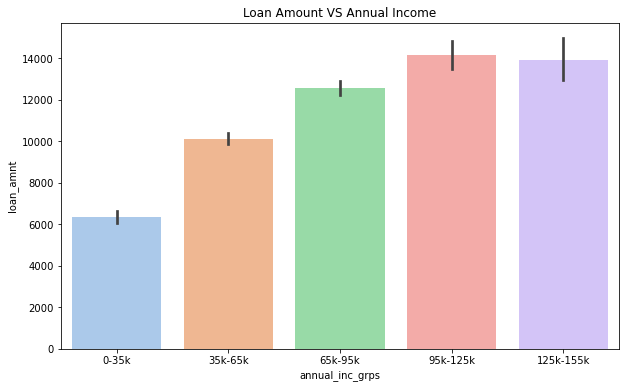

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'annual_inc_grps',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Annual Income')
plt.show()

# Observation - As the annual income increases, the loan amount also increases for the higher income grps

## Loan Amount VS DTI

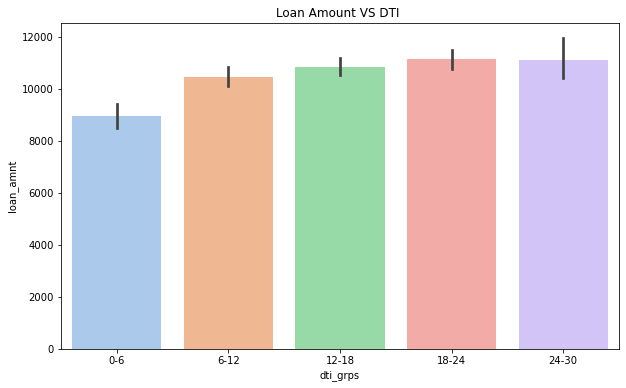

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'dti_grps',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS DTI ')
plt.show()

# Observation - As the DTI increases, loan amount also increases. Higher DTI groups require higher loan amounts 

## Loan Amount VS Grade

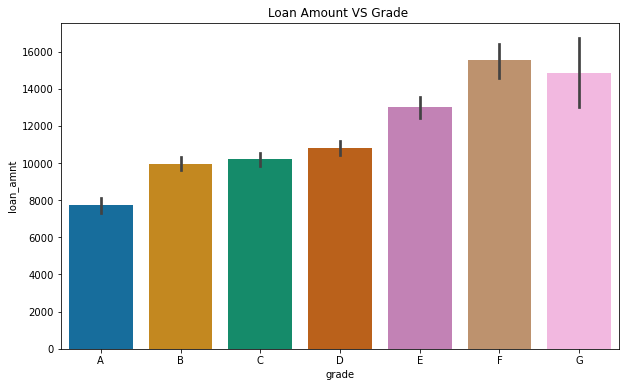

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'grade',y='loan_amnt',data=charged_off_data,palette='colorblind',order=['A','B','C','D','E','F','G'])
plt.title('Loan Amount VS Grade ')
plt.show()

# Observation - Applicants with lower credit card grades are taking larger loan amounts which can lead them to not pay the loan amount

## Loan Amount VS Interest Rate

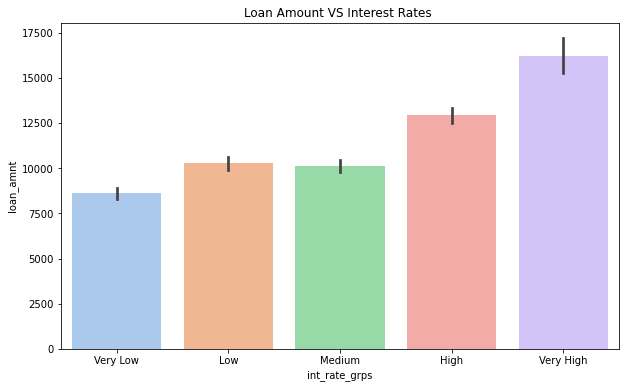

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'int_rate_grps',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Interest Rates ')
plt.show()

# Observation - Applicants with very high interest rates tend to take higher loan amounts increasting the possibility of defaulting

## Loan Amount VS Employee Length

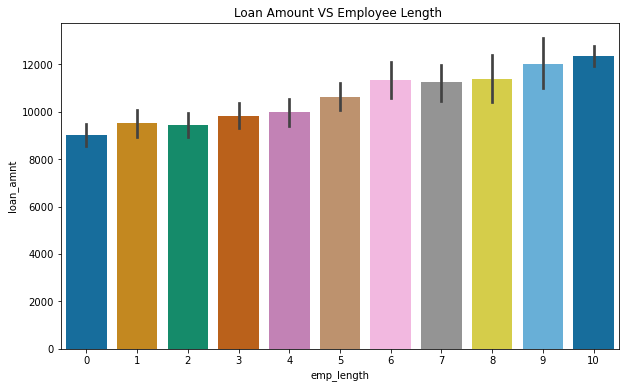

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'emp_length',y='loan_amnt',data=charged_off_data,palette='colorblind')
plt.title('Loan Amount VS Employee Length ')
plt.show()

# Observation - Applicants who have more than 10+ years of experience tend to take higher amount of loans

## Loan Amount VS Issue Year and Month

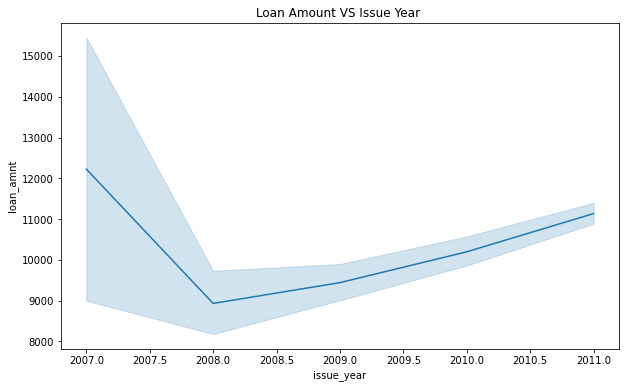

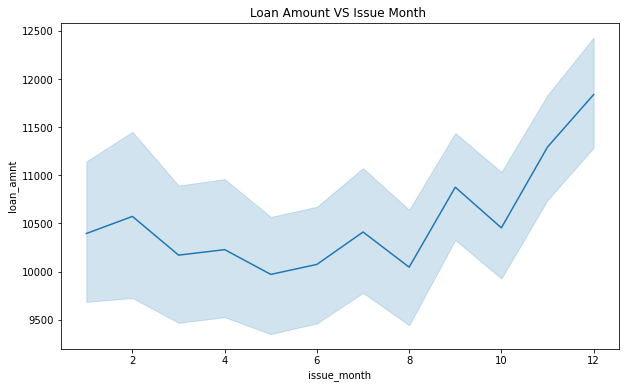

In [147]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'issue_year',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Issue Year ')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x = 'issue_month',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Issue Month ')
plt.show()

# Observation - 
# 1) There was a peak of loan amount in the year 2007 and again in the year 2011 we saw a growth in the loan amount 
#    indicating that in years 2007 and 2011, applicants have taken larger loan amounts

# 2) There was a peak of loan amount in the month of December indicating many individuals might have take loans during 
#    the holiday season



## Loan Amount VS Open Accounts

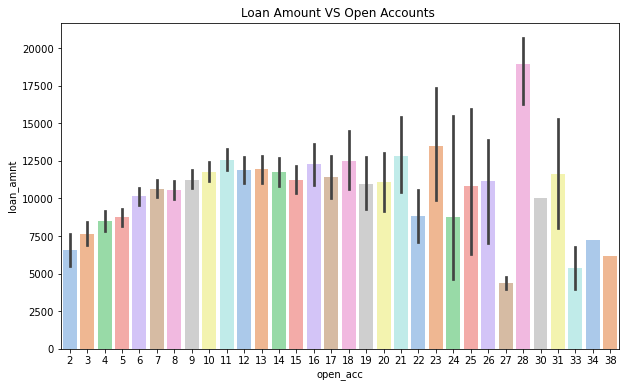

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'open_acc',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Open Accounts ')
plt.show()

# Observation - Applicants with higher amount of open accounts tend to take higher amount of loans but 
#               there is a variability.

## Loan Amount VS Installments

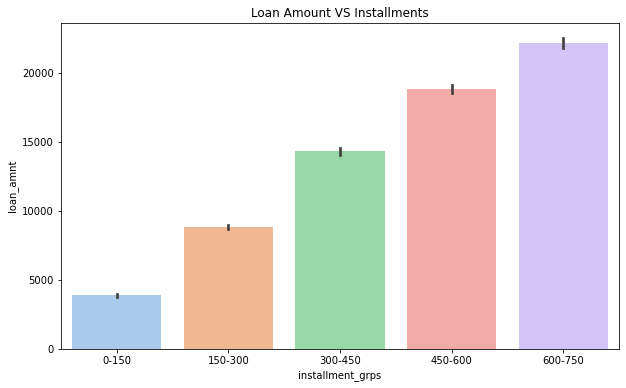

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'installment_grps',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Installments')
plt.show()

# Observation - Loan Applicants with higher number of installments have a higher tendency to default on their loans

## Loan Amount VS Address State

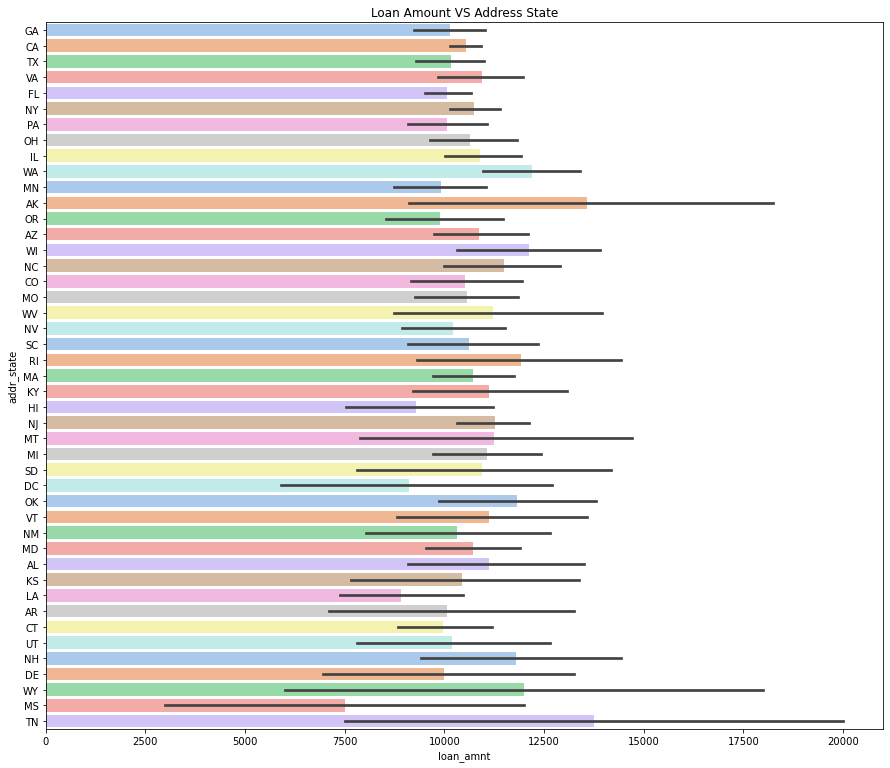

In [150]:
plt.figure(figsize=(15, 13))
sns.barplot(y = 'addr_state',x='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Address State')
plt.show()

# Observation - Applicants from State 'TN' and 'AK have highest number of loan amounts having a tendency to default on their loans

## Loan Amount VS Home Ownership

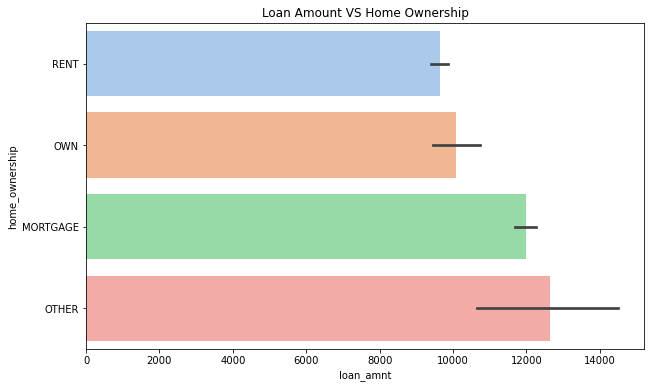

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(y = 'home_ownership',x='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Home Ownership')
plt.show()

# Observation - Applicants with 'Others'as their home ownership tend to have higher loan amounts as compared to people 
#               those who Rent,Own or have a Mortgage.

## Loan Amount VS Purpose

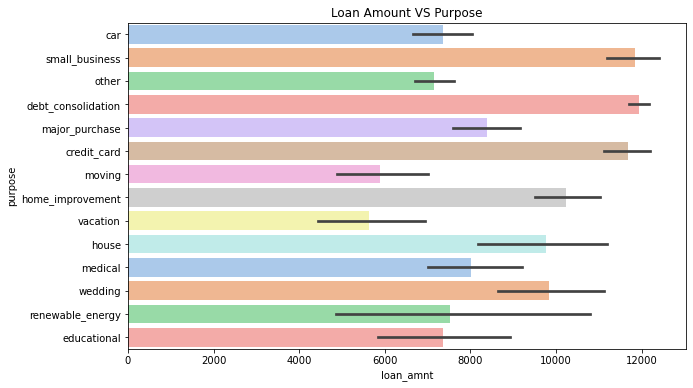

In [152]:
plt.figure(figsize=(10, 6))
sns.barplot(y = 'purpose',x='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Purpose')
plt.show()

# Observation - Applicants who have small business or who are consolidating their debts tend to have higher 
#               loan amounts indicating defaulting on their loan.

## Loan Amount VS Public Bankruptcies

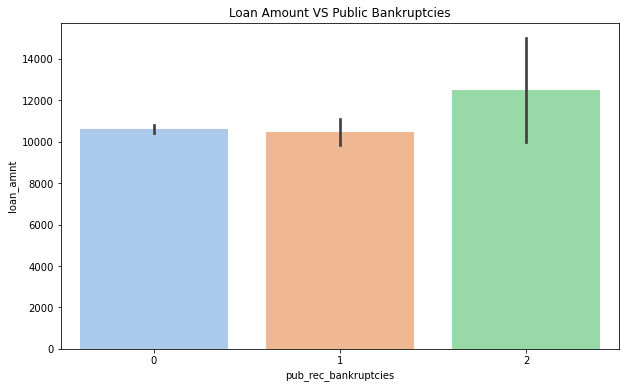

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'pub_rec_bankruptcies',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Public Bankruptcies')
plt.show()

# Observation - Applicants who have the record of higher public bankruptcies show a higher tendency in loan default.

## Loan Amount VS Funded Amount

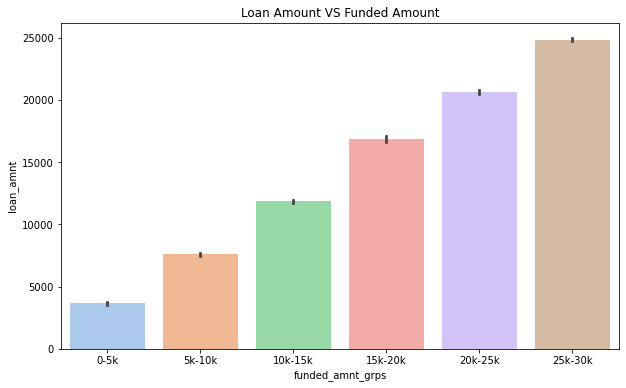

In [154]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'funded_amnt_grps',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Funded Amount')
plt.show()

# Observation - Loan applicants having higher funded amounts tend to default on their loans as compared to other funded amount groups.

## Loan Amount VS Verification Status

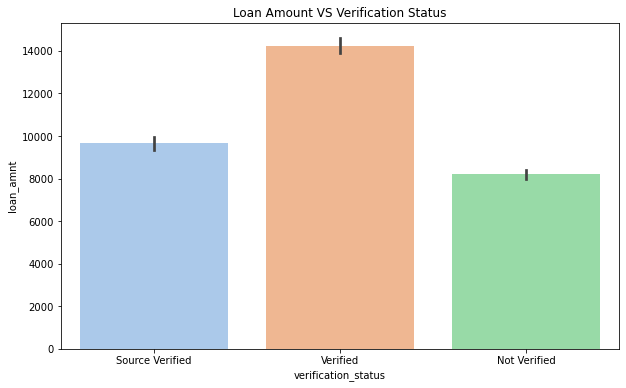

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'verification_status',y='loan_amnt',data=charged_off_data,palette='pastel')
plt.title('Loan Amount VS Verification Status')
plt.show()

# Observation - Surprisingly, loan applicants having verification status as Verified have a higher chance in loan defaulting.

## Annual Income VS Installments

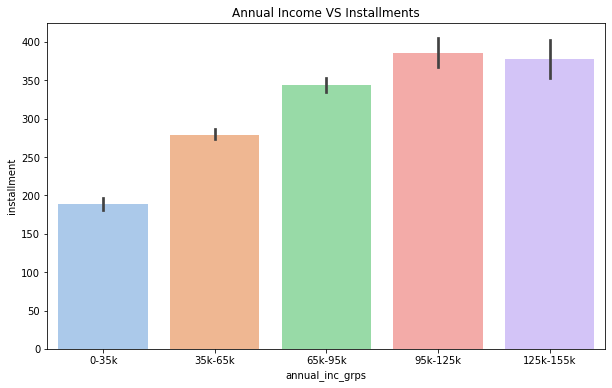

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'annual_inc_grps',y='installment',data=charged_off_data,palette='pastel')
plt.title('Annual Income VS Installments')
plt.show()

# Observation - Loan Applicants with higher annual income tend to pay their loan amount in higher number of installments.

## Multivariate Analysis

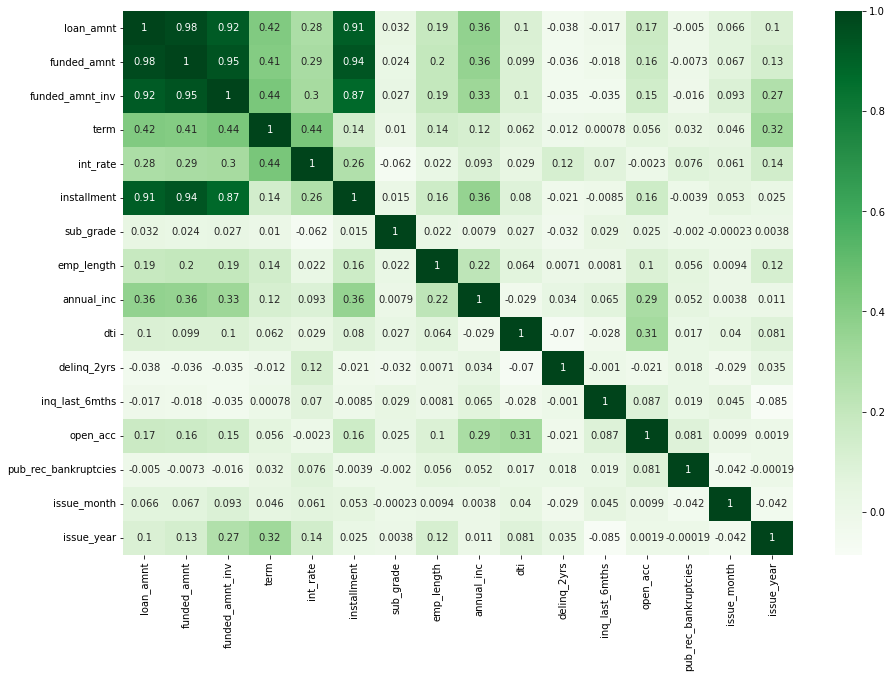

In [158]:
corr_data = loan_data[loan_data['loan_status'] == 'Charged Off']
corr_m = corr_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr_m, annot = True, cmap = 'Greens')
plt.show()

# Observation - 
# Loan amount and annual income have a moderately positive correlation
# Loan amount has a very strong positive correlation with installment, funded amount, funded amount investor